In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Database Data - Amazon Reviews.csv')

In [4]:
# Handling missing values
df['review_text'].fillna('', inplace=True)

In [5]:
# Preprocessing
# Tokenization and feature extraction using TF-IDF for the 'review_text'
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_text = tfidf_vectorizer.fit_transform(df['review_text'])

In [6]:
# Include 'rating' as a feature
X_rating = df['rating'].values.reshape(-1, 1)

In [7]:
# Concatenate the features
X = pd.concat([pd.DataFrame(X_text.toarray()), pd.DataFrame(X_rating)], axis=1)

In [8]:
# Define thresholds for positive, neutral, and negative ratings
positive_threshold = 4
negative_threshold = 2

In [9]:
# Convert 'rating' column to categorical based on thresholds
df['analysis_through_rating'] = pd.cut(df['rating'], bins=[-float('inf'), negative_threshold, positive_threshold, float('inf')],
                                        labels=['Negative', 'Neutral', 'Positive'])


In [10]:
# Target variable for training model on rating
y_rating = df['analysis_through_rating']


In [11]:
# Training the model for review analysis (Logistic Regression example)
classifier_review = LogisticRegression(max_iter=1000)
classifier_review.fit(X_text, y_rating)  # Using only review text for training

LogisticRegression(max_iter=1000)

In [12]:
# Predicting sentiment for the entire dataset based on review analysis
df['predicted_sentiment_review'] = classifier_review.predict(X_text)

In [13]:
# Function to determine overall sentiment analysis based on predicted sentiments from ratings and reviews
def determine_overall_sentiment(row):
    if row['predicted_sentiment_review'] == 'Positive':
        return 'Positive'
    elif row['predicted_sentiment_review'] == 'Negative':
        return 'Negative'
    else:
        return 'Neutral'

In [14]:
# Apply the function to create a new column for overall sentiment analysis
df['overall_sentiment_analysis'] = df.apply(determine_overall_sentiment, axis=1)

In [15]:
# Save the updated DataFrame to a new CSV file
df.to_csv('Updated_Amazon_Reviews.csv', index=False)


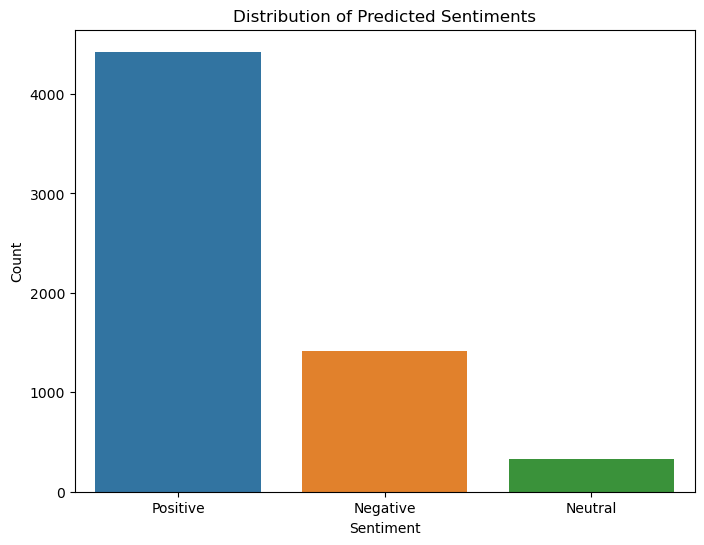

In [16]:
# Visualizing the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='overall_sentiment_analysis')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [19]:
# Predicting sentiment for reviews in the test set
X_text = tfidf_vectorizer.fit_transform(df['review_text'])
y_pred_review = classifier_review.predict(X_test.iloc[:, :-1])
accuracy_review = accuracy_score(y_test, y_pred_review)
print(f"Accuracy for review sentiment analysis: {accuracy_review}")


NameError: name 'X_test' is not defined